In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the train set
train_df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Load the test set
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
# Display the first few observations of our train data
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# Display the first few observations of our test data
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
# Get the shape of our train and test sets
print(f'The train set has {train_df.shape[0]} observations and {train_df.shape[1]} features.')
print(f'The test set has {test_df.shape[0]} observations and {test_df.shape[1]} features.')

The train set has 17000 observations and 9 features.
The test set has 3000 observations and 9 features.


In [ ]:
# Missing values assessment
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [ ]:
# Statistical summary of our train set
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


In [ ]:
# Statistical summary of our test set
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,3000.0,-119.589200,1.994936,-124.1800,-121.810,-118.48500,-118.020000,-114.4900
latitude,3000.0,35.635390,2.129670,32.5600,33.930,34.27000,37.690000,41.9200
housing_median_age,3000.0,28.845333,12.555396,1.0000,18.000,29.00000,37.000000,52.0000
total_rooms,3000.0,2599.578667,2155.593332,6.0000,1401.000,2106.00000,3129.000000,30450.0000
total_bedrooms,3000.0,529.950667,415.654368,2.0000,291.000,437.00000,636.000000,5419.0000
population,3000.0,1402.798667,1030.543012,5.0000,780.000,1155.00000,1742.750000,11935.0000
households,3000.0,489.912000,365.422710,2.0000,273.000,409.50000,597.250000,4930.0000
median_income,3000.0,3.807272,1.854512,0.4999,2.544,3.48715,4.656475,15.0001
median_house_value,3000.0,205846.275000,113119.687470,22500.0000,121200.000,177650.00000,263975.000000,500001.0000


In [ ]:
# Check for duplicates
print(f'The train set has {train_df.duplicated().sum()} duplicates.')
print(f'The test set has {test_df.duplicated().sum()} duplicates.')

The train set has 0 duplicates.
The test set has 0 duplicates.


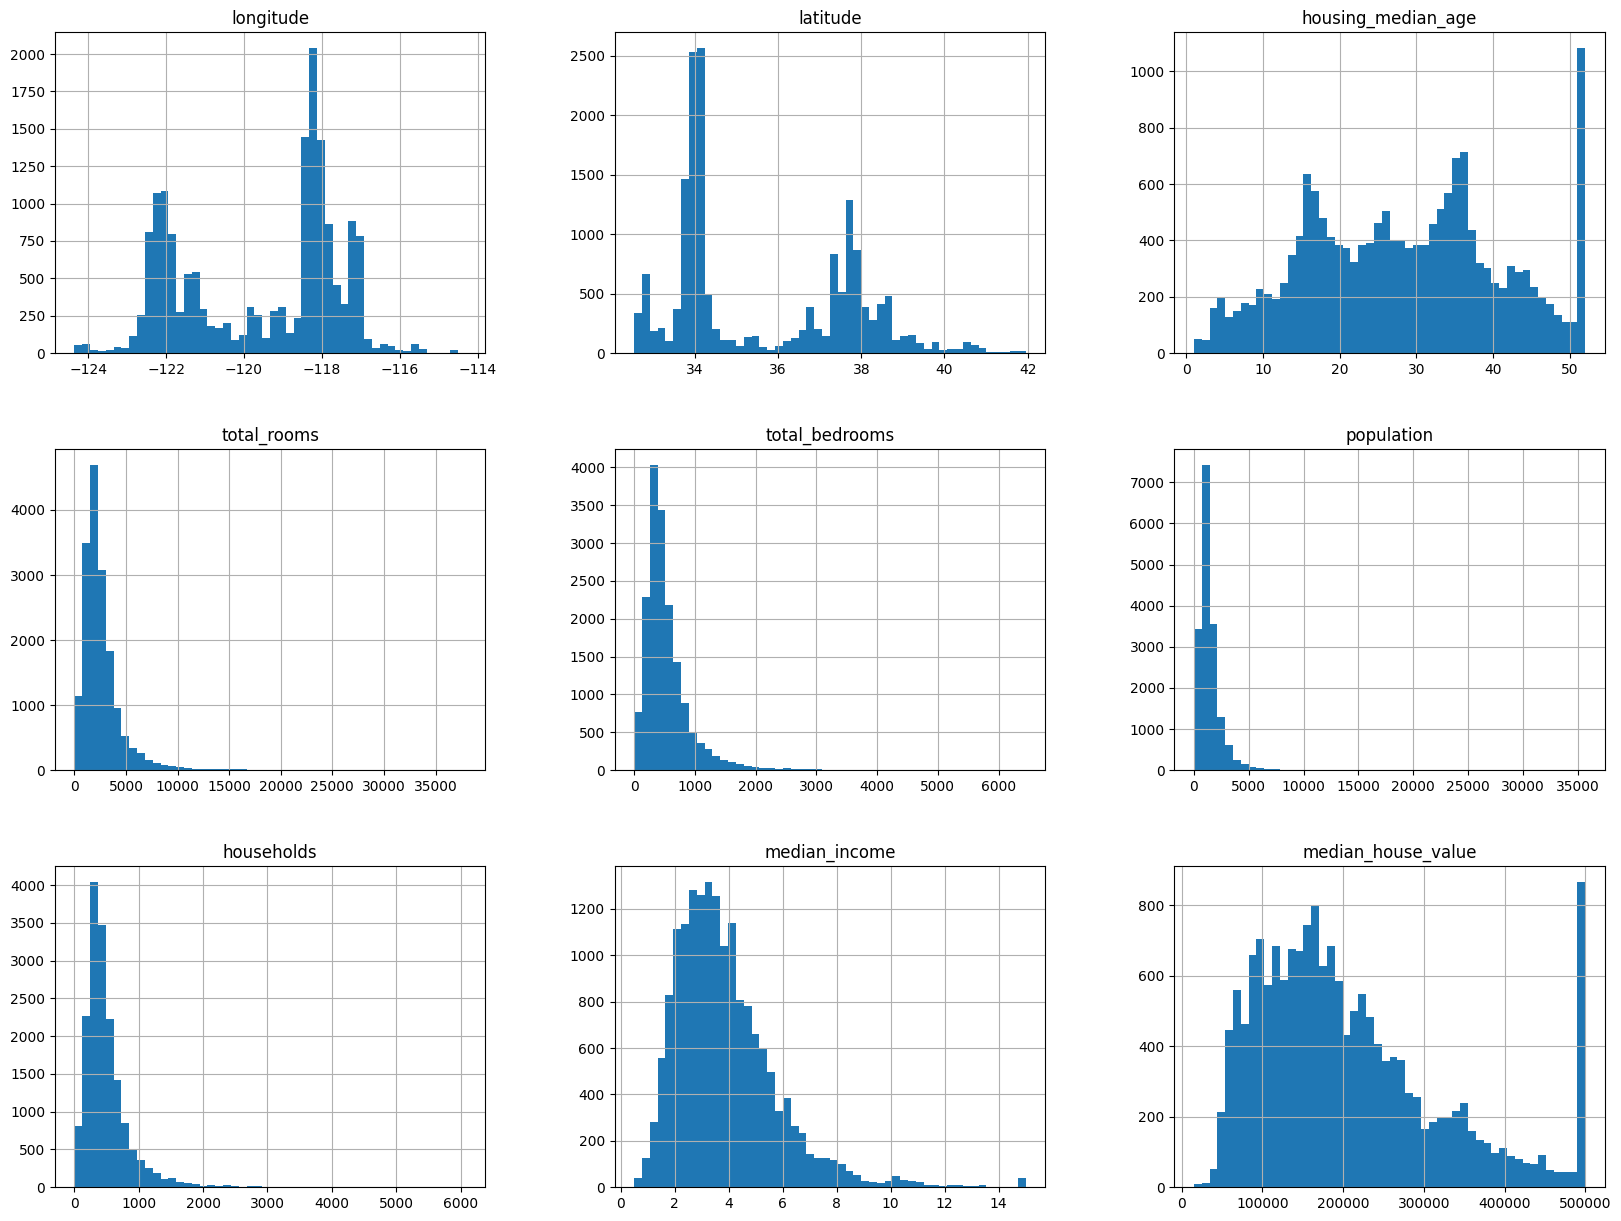

In [ ]:
train_df.hist(bins=50, figsize=(20, 15))
plt.show();

### Visualizing Geographical Data

In [ ]:
fig = px.scatter_geo(data_frame=train_df,
                    lat='latitude',
                    lon='longitude',
                    color='median_house_value',
                    scope='usa')
fig.show()

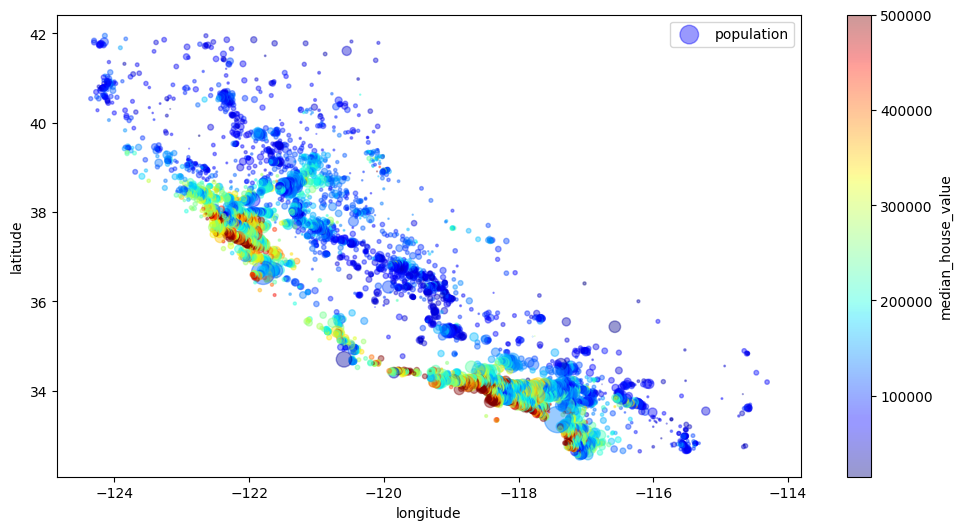

In [ ]:
train_df.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
              s = train_df['population']/100, label = 'population', figsize = (12, 6),
              c = 'median_house_value',
              cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show();

### Looking for Correlations

In [ ]:
corr_matrix = train_df.corr()

# Look at how much each attribute correlates with median_house_value
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691871
total_rooms           0.130991
housing_median_age    0.106758
households            0.061031
total_bedrooms        0.045783
population           -0.027850
longitude            -0.044982
latitude             -0.144917
Name: median_house_value, dtype: float64

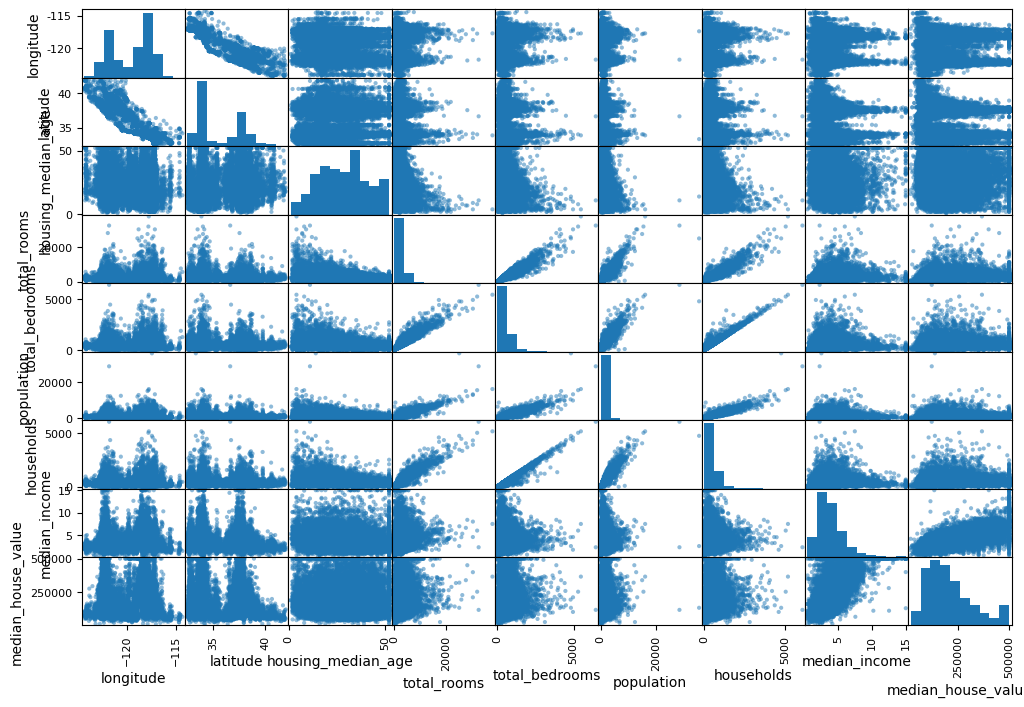

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_df, figsize=(12, 8));

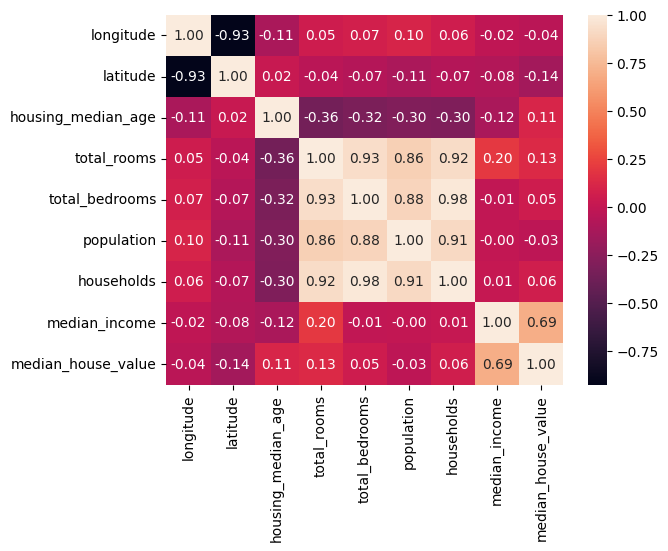

In [ ]:
# Correlation heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f');

## Feature Engineering

In [ ]:
train_df["rooms_per_household"] = train_df["total_rooms"]/train_df["households"]
train_df["bedrooms_per_room"] = train_df["total_bedrooms"]/train_df["total_rooms"]
train_df["population_per_household"] = train_df["population"]/train_df["households"]


In [ ]:
test_df["rooms_per_household"] = test_df["total_rooms"]/test_df["households"]
test_df["bedrooms_per_room"] = test_df["total_bedrooms"]/test_df["total_rooms"]
test_df["population_per_household"] = test_df["population"]/test_df["households"]


In [ ]:
corr_matrix = train_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691871
rooms_per_household         0.150081
total_rooms                 0.130991
housing_median_age          0.106758
households                  0.061031
total_bedrooms              0.045783
population                 -0.027850
population_per_household   -0.042764
longitude                  -0.044982
latitude                   -0.144917
bedrooms_per_room          -0.258190
Name: median_house_value, dtype: float64

## Prepare the Data for DNN

### Split the train set to train and validation set

In [ ]:
# Get feature names
feature_names = train_df.columns
feature_names

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [ ]:
# Separate features from target

X = train_df.drop('median_house_value', axis=1)
y = train_df['median_house_value']


In [ ]:
# Split the data into train and validation sets using stratification

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  shuffle=True)


## Modeling

In [ ]:
X_train.shape

(13600, 11)

In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential([
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(units=128, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(units=64, activation='relu'),
      tf.keras.layers.Dense(units=1, activation='linear')
])

  # Compile the model topography into code that
  # TensorFlow can efficiently execute. Configure
  # training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_absolute_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""
  early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=10, restore_best_weights=True)
  # Feed the feature values and the label values to the
  # model. The model will train for the specified number
  # of epochs, gradually learning how the feature values
  # relate to the label values.
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(X_val, y_val),
                      callbacks=[early_stopping])

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the
  # rest of history.
  epochs = history.epoch

  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean
  # squared error at each epoch.
  rmse = hist["root_mean_squared_error"]
  val_rmse = hist["val_root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse, val_rmse

print("Defined build_model and train_model")

Defined build_model and train_model


In [ ]:
learning_rate=0.01
epochs=200
my_batch_size=136

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse, val_rmse = train_model(my_model, X_train,
                                                         y_train, epochs,
                                                         my_batch_size)


Epoch 1/200
100/100 [==============================] - 2s 5ms/step - loss: 181293.3906 - root_mean_squared_error: 215419.9531 - val_loss: 93388.9766 - val_root_mean_squared_error: 126727.3750
Epoch 2/200
100/100 [==============================] - 0s 4ms/step - loss: 68257.6641 - root_mean_squared_error: 90733.6172 - val_loss: 71294.2656 - val_root_mean_squared_error: 100070.1172
Epoch 3/200
100/100 [==============================] - 0s 3ms/step - loss: 57970.0078 - root_mean_squared_error: 80149.9297 - val_loss: 57408.7148 - val_root_mean_squared_error: 82135.8984
Epoch 4/200
100/100 [==============================] - 0s 4ms/step - loss: 55820.2461 - root_mean_squared_error: 78004.1953 - val_loss: 54668.9688 - val_root_mean_squared_error: 77120.1094
Epoch 5/200
100/100 [==============================] - 0s 4ms/step - loss: 53667.6719 - root_mean_squared_error: 75515.3047 - val_loss: 53701.5234 - val_root_mean_squared_error: 76817.2031
Epoch 6/200
100/100 [==============================

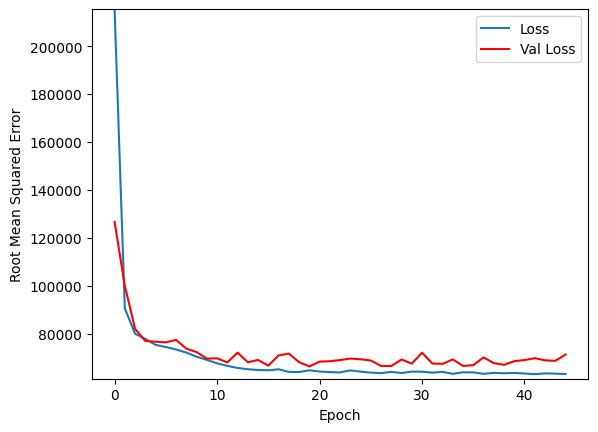

In [ ]:
def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.plot(epochs, val_rmse, label="Val Loss", color='red')
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

plot_the_loss_curve(epochs, rmse)

In [ ]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (136, 11)                44        
 ormalization)                                                   
                                                                 
 dense (Dense)               (136, 128)                1536      
                                                                 
 dense_1 (Dense)             (136, 64)                 8256      
                                                                 
 dense_2 (Dense)             (136, 1)                  65        
                                                                 
Total params: 9,901
Trainable params: 9,879
Non-trainable params: 22
_________________________________________________________________


### Evaluation on the test set

In [ ]:
test_results = {}
test_label = test_df.pop('median_house_value')
test_results['my_model'] = my_model.evaluate(test_df, test_label, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error (MHV)', 'Mean squared error (MHV)']).T

,Mean absolute error (MHV),Mean squared error (MHV)
my_model,45280.585938,68515.234375


94/94 [==============================] - 0s 1ms/step


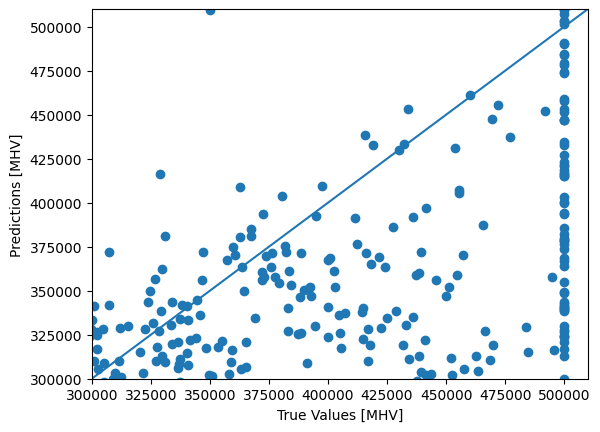

In [ ]:
test_predictions = my_model.predict(test_df).flatten()

# a = plt.axes(aspect='equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True Values [MHV]')
plt.ylabel('Predictions [MHV]')
lims = [300000, 510000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

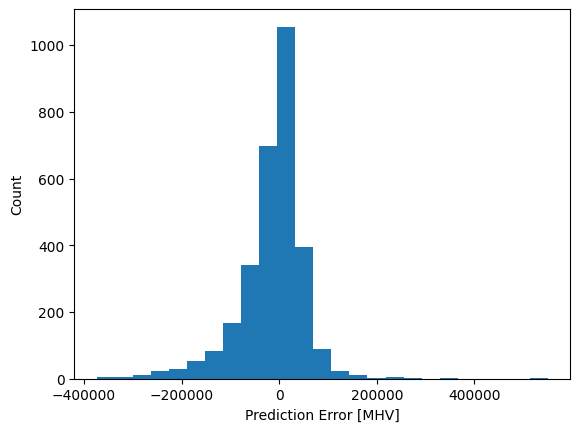

In [ ]:
error = test_predictions - test_label
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MHV]')
_ = plt.ylabel('Count')

In [ ]:
my_model.save('reg_dnn_model.keras')